# Avg Disk Intensity V.S. Disk Number 

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os

## Raw Value

In [2]:
def calculate_first_moment(speckle_pattern : list) -> list:
    # The width of each scattering pattern can be obtained as its first moment, e.g. the average of the product of the pixel intensity and its distance from q=0, typically divided by the average intensity. 
    # we start from the raw intensity value.

    # get properties of speckle image
    lenX = speckle_pattern[0].shape[0]
    lenY = speckle_pattern[0].shape[1]
    center_X = lenY // 2
    center_Y = lenY // 2
    # output angular distribution
    first_moment_list = []
    # Loop throught the accumlation list for each cell using the center to calculate the accumlation
    for img in speckle_pattern:
        img_accumlation = list()
        img_intensity = list()
        for i in range(lenX):
            for j in range(lenY):
                ind = int(np.sqrt((i - center_X)**2 + (j - center_Y)**2))
                assert ( 0 <= ind <= (int(np.sqrt((0 - center_X)**2 + (0 - center_Y)**2)) + 1) )
                img_accumlation.append(ind * img[i,j])
                img_intensity.append(img[i,j])
        
        first_moment_list.append(1.0 * np.mean(img_accumlation)/ np.mean(img_intensity))
    return first_moment_list

In [3]:
X_beadNumber = list()
Y_firstMoment = list()
Y_avg_firstMoment = list()
for i in range(2, 21):
    # for each beads number folder
    current_bead_img_list = []
    for mat_file in os.listdir("IntensityData/"+str(i)):
        mat_contents = sio.loadmat("IntensityData/"+str(i)+"/"+mat_file)
        img = mat_contents['pattern_data'] # 513 x 513
        current_bead_img_list.append(img)
    # calculate angular distribution of each speckle image
    current_bead_first_moment_list =  calculate_first_moment(current_bead_img_list)
    Y_firstMoment += current_bead_first_moment_list
    Y_avg_firstMoment.append(np.mean(current_bead_first_moment_list))
    X_beadNumber += ([i] * len(current_bead_first_moment_list))

assert( len(X_beadNumber) == len(Y_firstMoment))

In [4]:
np.savetxt("X_beadNumber_raw.csv", X_beadNumber,delimiter =", ")
np.savetxt("Y_fristMoment_raw.csv", Y_firstMoment,delimiter =", ")
np.savetxt("Y_avg_firstMoment_raw.csv", Y_avg_firstMoment,delimiter =", ")

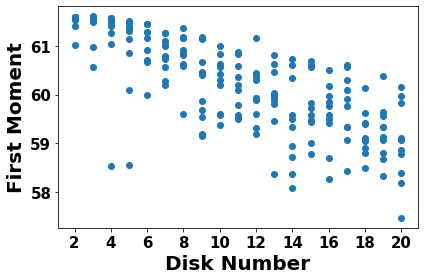

In [5]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter(X_beadNumber, Y_firstMoment)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig1.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

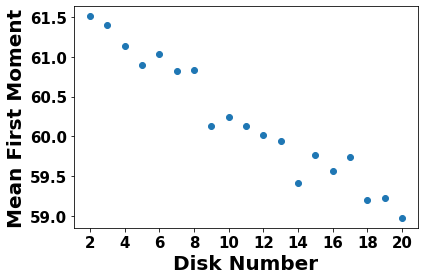

In [6]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter([i for i in range(2, 21)], Y_avg_firstMoment)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('Mean First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig2.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

# The processed data For ML

## Non Abs  Value of ML processed data

In [7]:
def calculate_first_moment_ML_nonAbs(speckle_pattern : list) -> list:
    # The width of each scattering pattern can be obtained as its first moment, e.g. the average of the product of the pixel intensity and its distance from q=0, typically divided by the average intensity. 
    # we start from the raw intensity value.

    # get properties of speckle image
    lenX = speckle_pattern[0].shape[0]
    lenY = speckle_pattern[0].shape[1]
    center_X = lenY // 2
    center_Y = lenY // 2
    # output angular distribution
    first_moment_list = []
    # Loop throught the accumlation list for each cell using the center to calculate the accumlation
    for img in speckle_pattern:
        img_accumlation = list()
        img_intensity = list()
        for i in range(lenX):
            for j in range(lenY):
                ind = int(np.sqrt((i - center_X)**2 + (j - center_Y)**2))
                assert ( 0 <= ind <= (int(np.sqrt((0 - center_X)**2 + (0 - center_Y)**2)) + 1) )
                img_accumlation.append((ind * img[i,j]))
                img_intensity.append(img[i,j])
        first_moment_list.append(1.0 * np.mean(img_accumlation)/ np.mean(img_intensity) + 1)
        #print(np.mean(img_intensity))
    return first_moment_list

In [8]:
X_beadNumber_ML = list()
Y_firstMoment_ML = list()
Y_avg_firstMoment_ML = list()
for i in range(2, 21):
    # for each beads number folder
    current_bead_img_list = []
    for mat_file in os.listdir("IntensityData/"+str(i)):
        mat_contents = sio.loadmat("IntensityData/"+str(i)+"/"+mat_file)
        img = mat_contents['pattern_data'] # 513 x 513
        assert img.shape == (513 , 513)
        # calculate global mean and standard deviation
        mean, std = img.mean(), img.std()
        # global standardization of pixels
        img = (img - mean) / std
        current_bead_img_list.append(img)
    # calculate angular distribution of each speckle image
    current_bead_first_moment_list =  calculate_first_moment_ML_nonAbs(current_bead_img_list)
    Y_firstMoment_ML += current_bead_first_moment_list
    Y_avg_firstMoment_ML.append(np.mean(current_bead_first_moment_list))
    X_beadNumber_ML += ([i] * len(current_bead_first_moment_list))

assert( len(X_beadNumber_ML) == len(Y_firstMoment_ML))

In [9]:
np.savetxt("X_beadNumber_ML_nonAbs.csv", X_beadNumber_ML,delimiter =", ")
np.savetxt("Y_fristMoment_ML_nonAbs.csv", Y_firstMoment_ML,delimiter =", ")
np.savetxt("Y_avg_firstMoment_ML_nonAbs.csv", Y_avg_firstMoment_ML,delimiter =", ")

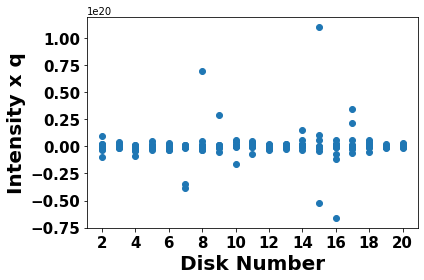

In [10]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter(X_beadNumber_ML, Y_firstMoment_ML)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('Intensity x q', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig3.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

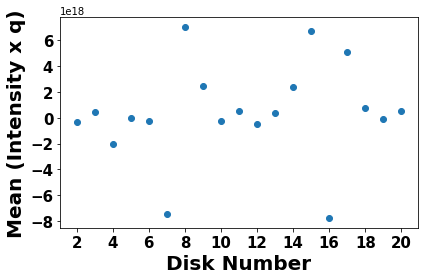

In [11]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter([i for i in range(2, 21)], Y_avg_firstMoment_ML)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('Mean (Intensity x q)', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig4.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

## Abs  Value of ML processed data

In [12]:
def calculate_first_moment_ML_Abs(speckle_pattern : list) -> list:
    # The width of each scattering pattern can be obtained as its first moment, e.g. the average of the product of the pixel intensity and its distance from q=0, typically divided by the average intensity. 
    # we start from the raw intensity value.

    # get properties of speckle image
    lenX = speckle_pattern[0].shape[0]
    lenY = speckle_pattern[0].shape[1]
    center_X = lenY // 2
    center_Y = lenY // 2
    # output angular distribution
    first_moment_list = []
    # Loop throught the accumlation list for each cell using the center to calculate the accumlation
    for img in speckle_pattern:
        img_accumlation = list()
        img_intensity = list()
        for i in range(lenX):
            for j in range(lenY):
                ind = int(np.sqrt((i - center_X)**2 + (j - center_Y)**2))
                assert ( 0 <= ind <= (int(np.sqrt((0 - center_X)**2 + (0 - center_Y)**2)) + 1) )
                img_accumlation.append(abs(ind * img[i,j]))
                img_intensity.append(abs(img[i,j]))
        first_moment_list.append(1.0 * np.mean(img_accumlation)/ np.mean(img_intensity) + 1)
        #print(np.mean(img_intensity))
    return first_moment_list

In [13]:
X_beadNumber_ML_Abs = list()
Y_firstMoment_ML_Abs = list()
Y_avg_firstMoment_ML_Abs = list()
for i in range(2, 21):
    # for each beads number folder
    current_bead_img_list = []
    for mat_file in os.listdir("IntensityData/"+str(i)):
        mat_contents = sio.loadmat("IntensityData/"+str(i)+"/"+mat_file)
        img = mat_contents['pattern_data'] # 513 x 513
        assert img.shape == (513 , 513)
        # calculate global mean and standard deviation
        mean, std = img.mean(), img.std()
        # global standardization of pixels
        img = (img - mean) / std
        current_bead_img_list.append(img)
    # calculate angular distribution of each speckle image
    current_bead_first_moment_list =  calculate_first_moment_ML_Abs(current_bead_img_list)
    Y_firstMoment_ML_Abs += current_bead_first_moment_list
    Y_avg_firstMoment_ML_Abs.append(np.mean(current_bead_first_moment_list))
    X_beadNumber_ML_Abs += ([i] * len(current_bead_first_moment_list))

assert( len(X_beadNumber_ML_Abs) == len(Y_firstMoment_ML_Abs))

In [14]:
np.savetxt("X_beadNumber_ML_Abs.csv", X_beadNumber_ML_Abs,delimiter =", ")
np.savetxt("Y_fristMoment_ML_Abs.csv", Y_firstMoment_ML_Abs,delimiter =", ")
np.savetxt("Y_avg_firstMoment_ML_Abs.csv", Y_avg_firstMoment_ML_Abs,delimiter =", ")

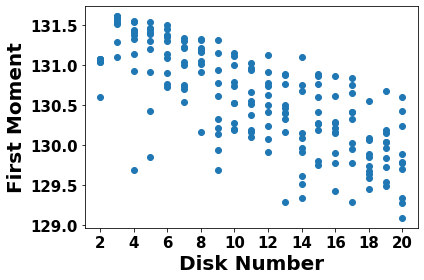

In [15]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter(X_beadNumber_ML_Abs, Y_firstMoment_ML_Abs)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig5.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

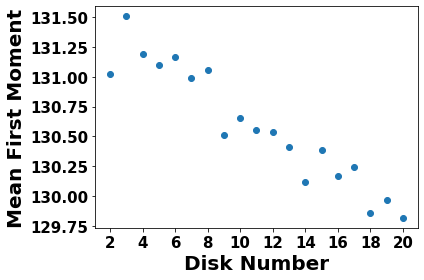

In [16]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

font_axis_publish_smaller = {
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter([i for i in range(2, 21)], Y_avg_firstMoment_ML_Abs)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('Mean First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig6.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

## Normalizing Raw Intensity Data

In [17]:
def calculate_first_moment_ML_Normal(speckle_pattern : list) -> list:
    # The width of each scattering pattern can be obtained as its first moment, e.g. the average of the product of the pixel intensity and its distance from q=0, typically divided by the average intensity. 
    # we start from the raw intensity value.

    # get properties of speckle image
    lenX = speckle_pattern[0].shape[0]
    lenY = speckle_pattern[0].shape[1]
    center_X = lenY // 2
    center_Y = lenY // 2
    # output angular distribution
    first_moment_list = []
    # Loop throught the accumlation list for each cell using the center to calculate the accumlation
    for img in speckle_pattern:
        img_accumlation = list()
        img_intensity = list()
        for i in range(lenX):
            for j in range(lenY):
                ind = int(np.sqrt((i - center_X)**2 + (j - center_Y)**2))
                assert ( 0 <= ind <= (int(np.sqrt((0 - center_X)**2 + (0 - center_Y)**2)) + 1) )
                img_accumlation.append(ind * img[i,j])
                img_intensity.append(img[i,j])
        first_moment_list.append(1.0 * np.mean(img_accumlation)/ np.mean(img_intensity) + 1)
        #print(np.mean(img_intensity))
    return first_moment_list

In [18]:
X_beadNumber_ML_Normal = list()
Y_firstMoment_ML_Normal = list()
Y_avg_firstMoment_ML_Normal = list()
for i in range(2, 21):
    # for each beads number folder
    current_bead_img_list = []
    for mat_file in os.listdir("IntensityData/"+str(i)):
        mat_contents = sio.loadmat("IntensityData/"+str(i)+"/"+mat_file)
        img = mat_contents['pattern_data'] # 513 x 513
        assert img.shape == (513 , 513)
        # calculate global mean and standard deviation
        g_min, g_max = img.min(), img.max()
        # global standardization of pixels
        img = (img - g_min) / (g_max - g_min)
        current_bead_img_list.append(img)
    # calculate angular distribution of each speckle image
    current_bead_first_moment_list =  calculate_first_moment_ML_Normal(current_bead_img_list)
    Y_firstMoment_ML_Normal += current_bead_first_moment_list
    Y_avg_firstMoment_ML_Normal.append(np.mean(current_bead_first_moment_list))
    X_beadNumber_ML_Normal += ([i] * len(current_bead_first_moment_list))

assert( len(X_beadNumber_ML_Normal) == len(Y_firstMoment_ML_Normal))

In [19]:
np.savetxt("X_beadNumber_ML_Normal.csv", X_beadNumber_ML_Normal,delimiter =", ")
np.savetxt("Y_fristMoment_ML_Normal.csv", Y_firstMoment_ML_Normal,delimiter =", ")
np.savetxt("Y_avg_firstMoment_ML_Normal.csv", Y_avg_firstMoment_ML_Normal,delimiter =", ")

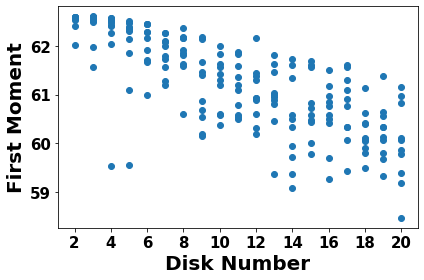

In [20]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter(X_beadNumber_ML_Normal, Y_firstMoment_ML_Normal)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig7.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)

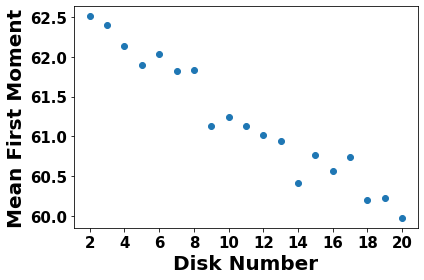

In [21]:
# Font for figure
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

font_axis_publish_smaller = {
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

labelsize = 15

fignow = plt.figure()
ax = plt.gca()


markSizeSetter = 9
# multiple line plot
plt.scatter([i for i in range(2, 21)], Y_avg_firstMoment_ML_Normal)
#plt.legend(prop={'weight': 'bold', 'size': 15})

#plt.plot(dat['IoU'], dat['median'], color='r')
#plt.fill_between(dat['dose(dpa)'], dat['75th_percentile'], dat['25_percentile'], color='gray', alpha=0.2)

# Figure information
plt.ylabel('Mean First Moment', fontdict=font_axis_publish)

#plt.xlim(0,1000)
plt.xlabel('Disk Number', fontdict=font_axis_publish)

tick_marks = np.arange(2, 21, 2)
x_target_names = [str(i) for i in range(2, 21, 2)]
plt.xticks(tick_marks, x_target_names)

for ticklabel in (ax.get_xticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

for ticklabel in (ax.get_yticklabels()):
    ticklabel.set_fontsize(labelsize)
    ticklabel.set_fontweight('bold')

#plt.show()
fignow.tight_layout()
fignow.savefig("fig8.png",format = "png",dpi=300, bbox_inches='tight', pad_inches=0.2)